In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns

In [61]:
# Importing the dataset

cars_df = pd.read_csv('cars_Kmeans.csv')
cars_df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [62]:
#shape of dataset
cars_df.shape

(398, 9)

In [63]:
#datatypes of columns
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [64]:
# We could see "?" values in column, this should be removed from data set
cars_df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [65]:
cars_df[cars_df['hp']=='?'].count()

mpg         6
cyl         6
disp        6
hp          6
wt          6
acc         6
yr          6
origin      6
car_name    6
dtype: int64

###### There are non numeric values in hp column

In [66]:
cars_df.isnull().values.any()

False

In [67]:
duplicate = cars_df.duplicated()
sum(duplicate)

0

In [68]:

cars_df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

###### No Null and Duplicate values obseved

In [69]:
# replace ? with NaN
cars_df = cars_df.replace('?',np.nan)
#cars_df.head(40)

In [70]:
cars_df['cyl'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

There are 5 unique values for cylinder. Number of Cyl can affect mpg, so taking median on whole column and replacing '?' with it may not be proper. 
    
Grouping  'hp' values depending on 'cyl' and taking median correspondingly.
Replacing ? values with corresponding median values

In [71]:
#impute NaN values with median for coresponding cyl dimension
cars_df.loc[cars_df['cyl'] == 8] = cars_df.loc[cars_df['cyl'] == 8].fillna(cars_df.loc[cars_df['cyl'] == 8].median())
cars_df.loc[cars_df['cyl'] == 4] = cars_df.loc[cars_df['cyl'] == 4].fillna(cars_df.loc[cars_df['cyl'] == 4].median())
cars_df.loc[cars_df['cyl'] == 6] = cars_df.loc[cars_df['cyl'] == 6].fillna(cars_df.loc[cars_df['cyl'] == 6].median())

In [72]:
cars_df.isnull().values.any()

False

In [73]:
cars_df['hp'] = cars_df['hp'].astype('float64')

In [74]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [75]:
cars_df.head(40)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


# Use visualization techniques to derive insights and from the data

In [76]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.125628,38.313624,46.0,76.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


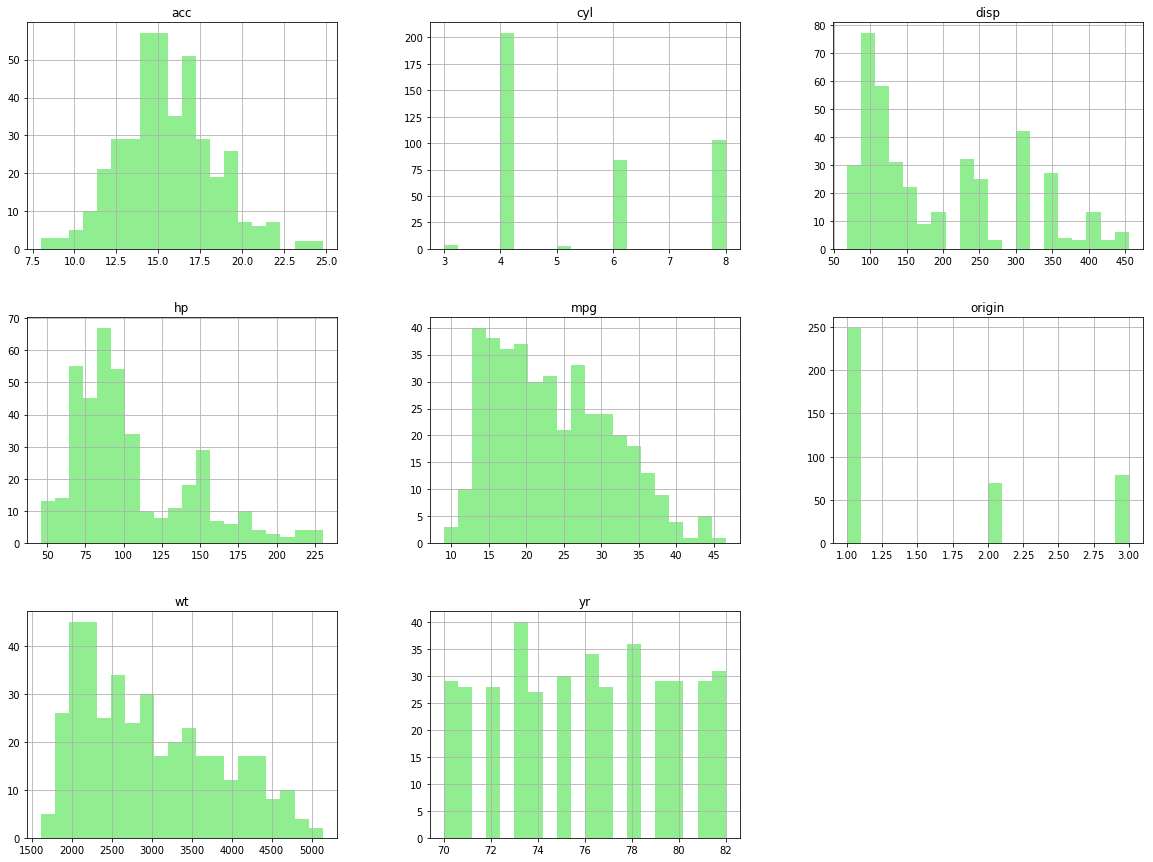

In [77]:
# visualize the distribution of the features of the cars
cars_df.hist(figsize=(20,15),bins=20,color='lightgreen')
plt.show()

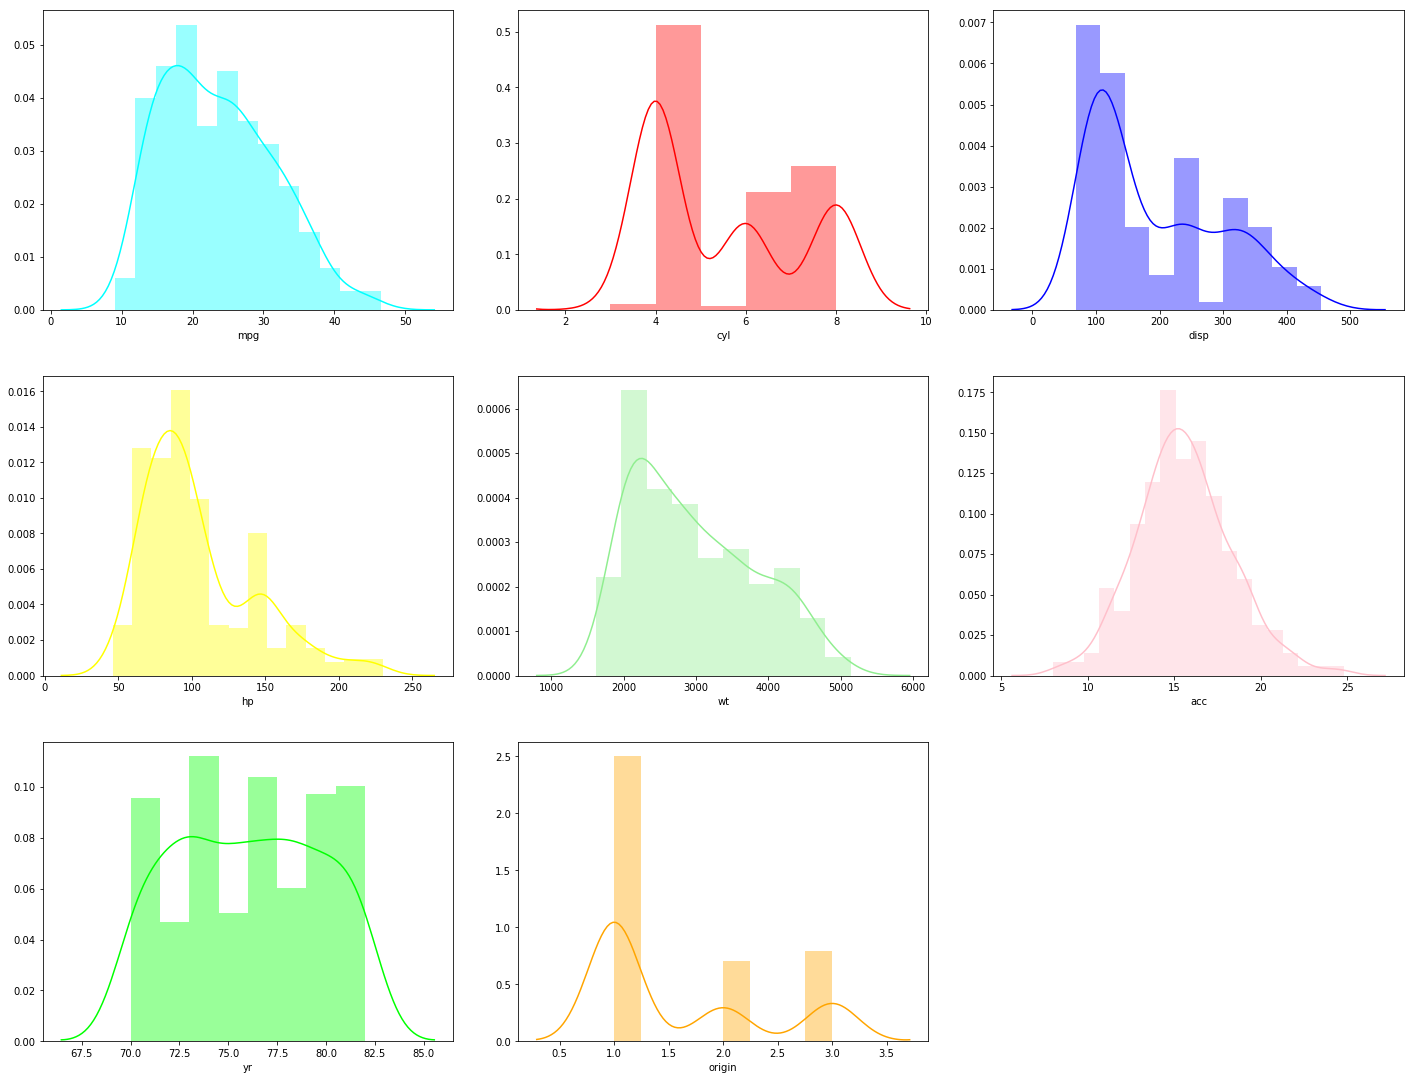

In [78]:
#### import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20,20)) 
temp=cars_df.columns.drop("car_name")
colors = ['cyan','red','blue','yellow','lightgreen','pink','lime','orange']
for col in temp:
    index = cars_df.columns.get_loc(col)
    plt.subplot(4,3,index+1)
    sns.distplot(cars_df[col],color=colors[index])
    plt.xlabel("{}\n".format(col))
plt.tight_layout(pad=2.0)    

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64


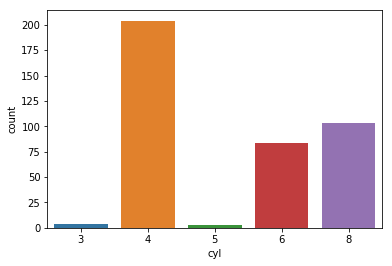

In [79]:
sns.countplot(cars_df["cyl"])

print(cars_df["cyl"].value_counts())

1    249
3     79
2     70
Name: origin, dtype: int64


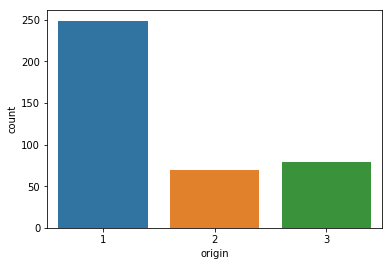

In [80]:
sns.countplot(cars_df["origin"])

print(cars_df["origin"].value_counts())

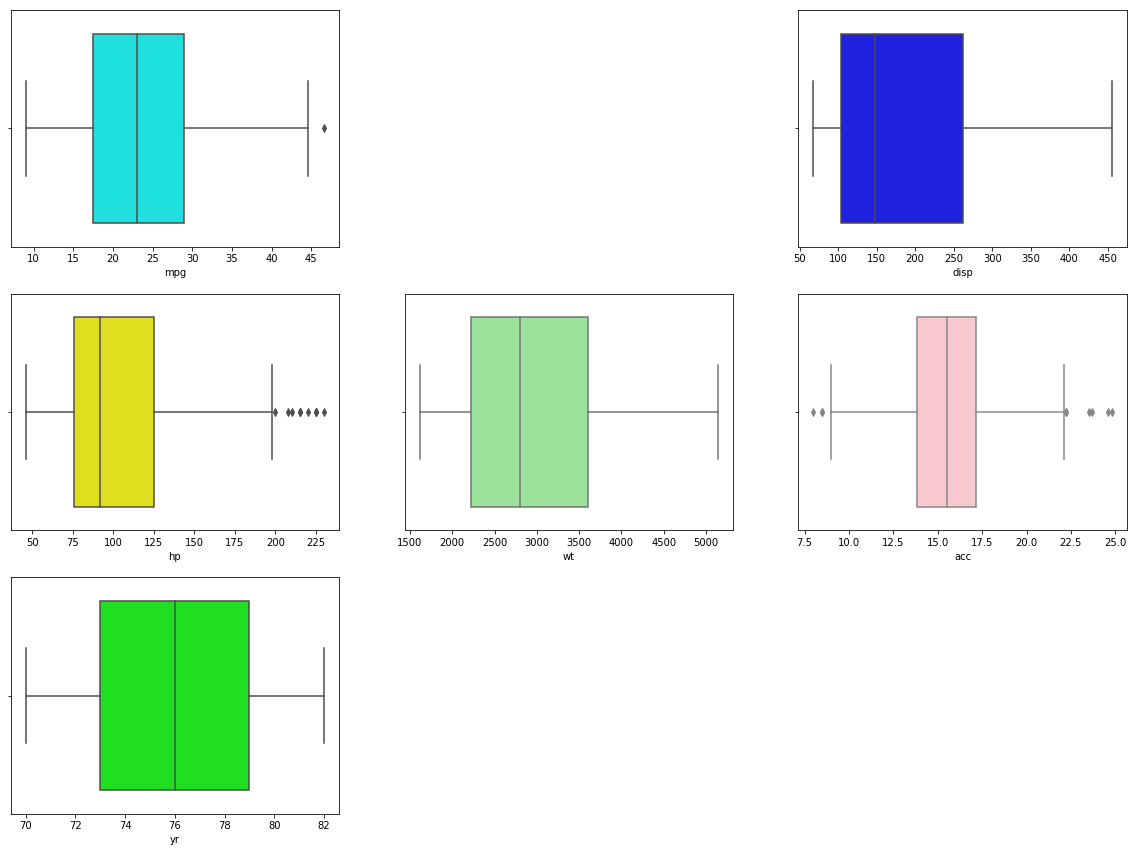

In [81]:
temp=cars_df.columns.drop(["car_name",'origin','cyl'])
plt.figure(figsize=(20,20)) 
colors = ['cyan','red','blue','yellow','lightgreen','pink','lime','orange']
for col in temp:
    index = cars_df.columns.get_loc(col)
    plt.subplot(4,3,index+1)
    box=sns.boxplot(x=col, data=cars_df, orient="h",color=colors[index])


In [82]:
cars_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.775590,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.843781,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.897520,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.775590,0.843781,0.897520,1.000000,0.863608,-0.688085,-0.416827,-0.450229
wt,-0.831741,0.896017,0.932824,0.863608,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.688085,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.416827,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.450229,-0.581024,0.205873,0.180662,1.000000


Text(0.5,1,'Correlation Matrix')

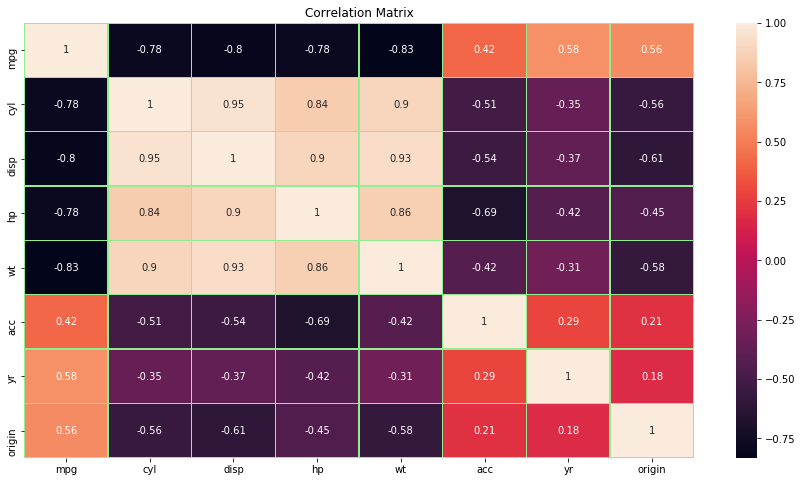

In [83]:
plt.figure(figsize=(15, 8))
sns.heatmap(cars_df.corr(), linewidths=0.5,vmax=1.0, 
            linecolor='lightgreen', annot=True)
plt.title('Correlation Matrix')

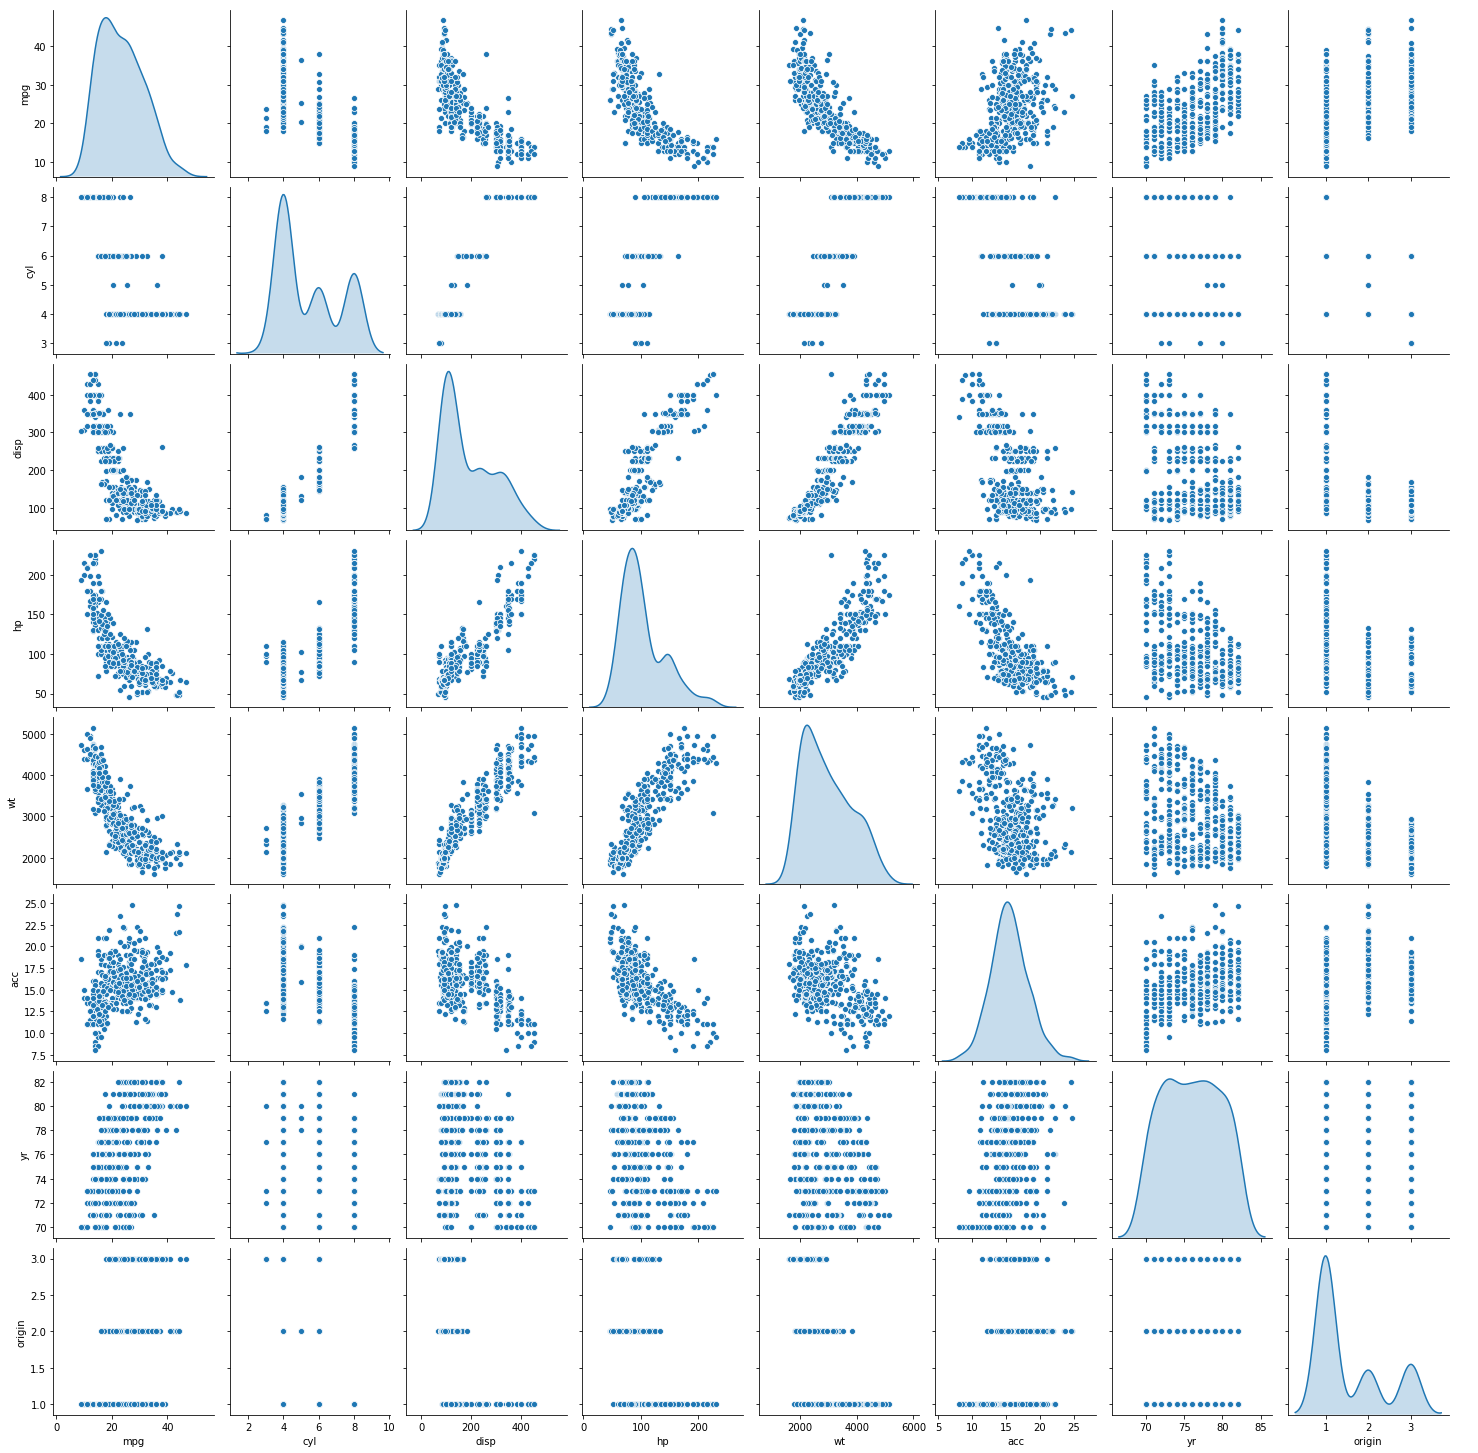

In [84]:
temp=cars_df.iloc[:, 0:8]
sns.pairplot(temp,diag_kind='kde',palette='husl')

###### Inference

The data distribution across various dimensions except 'Acc' do not look normal
Close observation between 'mpg' and other attributes indicate the relationship is not really linear
relation between 'mpg' and 'hp' show hetroscedacity... which will impact model accuracy

There is a negative co-relation between disp-mpg, hp-mpg, wt-mpg. mpg decreases whenever those attribute increases.
mpg seems to be doing better as year of the vehicle increases. Cars manufactured in 80s yield better mpg than the ones made in 70s
Cylinder seems to have 3-4 gaussians as shown in the pairplot. 
As  cylinders increase the mpg decreases but there are 3 gaussians which could translate to three clusters.


## Use Machine Learning algorithms like K Means or Hierarchical clustering to find out the optimal number of clusters in the data

In [85]:
# remove the car name column
cars = cars_df.drop(['car_name','origin'] , axis = 1)

In [86]:
from scipy.stats import zscore
cars_z = cars.apply(zscore)
cars_z.head(5)

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706439,1.498191,1.090604,0.676181,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.590844,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.198845,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.198845,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.937513,0.565841,-1.840117,-1.627426


###### KMeans Clustering algorithm

In [87]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 8)   # expecting 3 to 4 clusters from the pair plot observation
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5, random_state=1)
  clusters.fit(cars_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1294.311554
1,3,944.776620
2,4,737.011646
3,5,664.330242
4,6,597.593032
5,7,547.521430


###### cluster_errors above shows a diminshing sum of squared errors reducing as the number of clusters increase

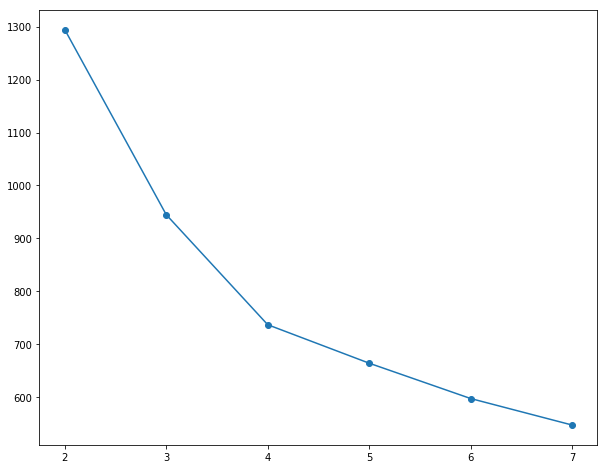

In [88]:
# Elbow plot
plt.figure(figsize=(10,8))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


###### From the elbow plot its evident that at elbow/bend occurs at 4

In [89]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(cars_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [90]:
centroids = cluster.cluster_centers_
centroids

array([[-0.49682681,  0.42443037,  0.30530323, -0.03113937,  0.33776539,
         0.29367006,  0.03298635],
       [ 1.19411648, -0.82450284, -0.78042723, -0.75055211, -0.76525521,
         0.38447752,  1.12432606],
       [-1.16379715,  1.49819126,  1.50392292,  1.5227306 ,  1.40409797,
        -1.0861486 , -0.68832385],
       [ 0.21628669, -0.86209143, -0.80905811, -0.55874225, -0.76253463,
         0.32055871, -0.61862263]])

In [91]:
#centroid_df = pd.DataFrame(centroids, columns = list(cars_z) )
#centroid_df

In [92]:
#cars_z

In [93]:
prediction=cluster.predict(cars_z) # gives the cluster id of each row in the dataframe
cars_z["CLUSTERS"] = prediction   

In [94]:

cars_z.groupby("CLUSTERS").count()

,mpg,cyl,disp,hp,wt,acc,yr
CLUSTERS,,,,,,,
0,91,91,91,91,91,91,91
1,111,111,111,111,111,111,111
2,94,94,94,94,94,94,94
3,102,102,102,102,102,102,102


In [95]:
cars_z_df_0 = cars_z.groupby("CLUSTERS").get_group(0)
cars_z_df_0.shape

(91, 8)

In [96]:
cars_z_df_1 = cars_z.groupby("CLUSTERS").get_group(1)
cars_z_df_1.shape

(111, 8)

In [97]:
cars_z_df_2 = cars_z.groupby("CLUSTERS").get_group(2)
cars_z_df_2.shape

(94, 8)

In [98]:
cars_z_df_3 = cars_z.groupby("CLUSTERS").get_group(3)
cars_z_df_3.shape

(102, 8)

#### Use linear regression model on different clusters separately and print the coefficients of the models individually 

#### For Cluster 1

In [99]:
# Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [100]:
x = cars_z_df_0.drop(['mpg'],axis=1)
y = cars_z_df_0['mpg']

In [101]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [102]:
LR_0 = LinearRegression()
LR_0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
for i, col_name in enumerate(X_train.columns):
    print("Coefficient of Linear Regression for Cluster 1 is =  {} is {}".format(col_name, LR_0.coef_[i]))

Coefficient of Linear Regression for Cluster 1 is =  cyl is 0.1798078998029025
Coefficient of Linear Regression for Cluster 1 is =  disp is -0.04676602939530841
Coefficient of Linear Regression for Cluster 1 is =  hp is -0.18749335907803066
Coefficient of Linear Regression for Cluster 1 is =  wt is -0.419036736990532
Coefficient of Linear Regression for Cluster 1 is =  acc is -0.06796313756480726
Coefficient of Linear Regression for Cluster 1 is =  yr is 0.25544558592209565
Coefficient of Linear Regression for Cluster 1 is =  CLUSTERS is 0.0


In [104]:
from sklearn import metrics
y_predict_0 = LR_0.predict(X_test)
r_squared_0 = metrics.r2_score(y_test,y_predict_0)
r_squared_0

0.30076386122419974

In [105]:
LR_0.score(X_test, y_test)
print("Score Cluster 1 is =  {}".format(LR_0.score(X_test, y_test)))

Score Cluster 1 is =  0.30076386122419974


#### For Cluster 2

In [106]:
x = cars_z_df_1.drop(['mpg'],axis=1)
y = cars_z_df_1['mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
LR_1 = LinearRegression()
LR_1.fit(X_train,y_train)
for i, col_name in enumerate(X_train.columns):
    print("Coefficient of Linear Regression for Cluster 2 is =  =  {} is {}".format(col_name, LR_1.coef_[i]))

Coefficient of Linear Regression for Cluster 2 is =  =  cyl is 0.7972868174046418
Coefficient of Linear Regression for Cluster 2 is =  =  disp is 0.14277839099768724
Coefficient of Linear Regression for Cluster 2 is =  =  hp is -0.4659694920505849
Coefficient of Linear Regression for Cluster 2 is =  =  wt is -0.9376030992818575
Coefficient of Linear Regression for Cluster 2 is =  =  acc is 0.0944132076606257
Coefficient of Linear Regression for Cluster 2 is =  =  yr is 0.3830458418335952
Coefficient of Linear Regression for Cluster 2 is =  =  CLUSTERS is 0.0


In [107]:

y_predict_1 = LR_1.predict(X_test)
r_squared_1 = metrics.r2_score(y_test,y_predict_1)
r_squared_1

0.4958470181611869

In [108]:
LR_1.score(X_test, y_test)
print("Score Cluster 2 is =  {} ".format(LR_1.score(X_test, y_test)))

Score Cluster 2 is =  0.4958470181611869 


#### For Cluster 3

In [109]:
x = cars_z_df_2.drop(['mpg'],axis=1)
y = cars_z_df_2['mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
LR_2 = LinearRegression()
LR_2.fit(X_train,y_train)
for i, col_name in enumerate(X_train.columns):
    print("Coefficient of Linear Regression for Cluster 3 is =  =  {} is {}".format(col_name, LR_2.coef_[i]))

Coefficient of Linear Regression for Cluster 3 is =  =  cyl is 0.0
Coefficient of Linear Regression for Cluster 3 is =  =  disp is 0.005410946309572824
Coefficient of Linear Regression for Cluster 3 is =  =  hp is -0.16723783076294796
Coefficient of Linear Regression for Cluster 3 is =  =  wt is -0.14001796041448936
Coefficient of Linear Regression for Cluster 3 is =  =  acc is -0.16726899813012822
Coefficient of Linear Regression for Cluster 3 is =  =  yr is 0.1472339812738124
Coefficient of Linear Regression for Cluster 3 is =  =  CLUSTERS is 0.0


In [110]:

y_predict_2 = LR_2.predict(X_test)
r_squared_2 = metrics.r2_score(y_test,y_predict_2)
r_squared_2

0.3122518301378142

In [111]:
LR_2.score(X_test, y_test)
print("Score Cluster 3 is =  {} ".format(LR_2.score(X_test, y_test)))

Score Cluster 3 is =  0.3122518301378142 


#### For Cluster 4

In [112]:
x = cars_z_df_3.drop(['mpg'],axis=1)
y = cars_z_df_3['mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)
LR_3 = LinearRegression()
LR_3.fit(X_train,y_train)
for i, col_name in enumerate(X_train.columns):
    print("Coefficient of Linear Regression for Cluster 4 is =  =  {} is {}".format(col_name, LR_3.coef_[i]))

Coefficient of Linear Regression for Cluster 4 is =  =  cyl is 0.5561693324743323
Coefficient of Linear Regression for Cluster 4 is =  =  disp is -0.6205989449632785
Coefficient of Linear Regression for Cluster 4 is =  =  hp is -0.22414327309814974
Coefficient of Linear Regression for Cluster 4 is =  =  wt is -0.5690488331545642
Coefficient of Linear Regression for Cluster 4 is =  =  acc is -0.09440724888169871
Coefficient of Linear Regression for Cluster 4 is =  =  yr is 0.17840784734820705
Coefficient of Linear Regression for Cluster 4 is =  =  CLUSTERS is 0.0


In [113]:

y_predict_3 = LR_3.predict(X_test)
r_squared_3 = metrics.r2_score(y_test,y_predict_3)
r_squared_3

0.5406624657355664

In [114]:
LR_3.score(X_test, y_test)
print("Score Cluster 4 is =  {} ".format(LR_3.score(X_test, y_test)))

Score Cluster 4 is =  0.5406624657355664 


### Single model without clustering

In [115]:
X = cars.drop('mpg', axis=1)
y = cars[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print("The coefficient for Single LR model {} is {}".format(col_name, LR_Model.coef_[0][i]))

The coefficient for Single LR model cyl is -0.17901870080335983
The coefficient for Single LR model disp is 0.010941521100008827
The coefficient for Single LR model hp is -0.008525922765793474
The coefficient for Single LR model wt is -0.0072005571808952075
The coefficient for Single LR model acc is 0.030994294575876016
The coefficient for Single LR model yr is 0.7884563586971769


In [116]:
intercept = LR_Model.intercept_[0]
print("The intercept for Single LR model is {}".format(intercept))

The intercept for Single LR model is -15.673112006471424


In [117]:
LR_Model.score(X_test, y_test)
print("Score SIngle LR Model =  {} ".format(LR_Model.score(X_test, y_test)))

Score SIngle LR Model =  0.8270191562386189 


In [118]:
y_predict_Model = LR_Model.predict(X_test)
r_squared_Model = metrics.r2_score(y_test,y_predict_Model)
r_squared_Model

0.8270191562386189

# END